<a href="https://colab.research.google.com/github/DanielaRandazo/coderhouse/blob/main/ProyectoDS_ParteIII_Randazo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estructura del proyecto:

Analisis principal: Las películas de género "Drama" tienen una evolucion significativamente mayor que las películas de género "Accion".

Debajo encontraremos mas hipotesis que iremos analizando con profundidad.

In [ ]:
from google.colab import drive
drive.mount('/CoderHouse')

Mounted at /CoderHouse


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
DF_IMDB = pd.read_csv('/CoderHouse/MyDrive/CoderHouse/IMDB.csv')


# ***Analisis y evolucion de la industria cinematografica a nivel mundial en las ultimas decadas***
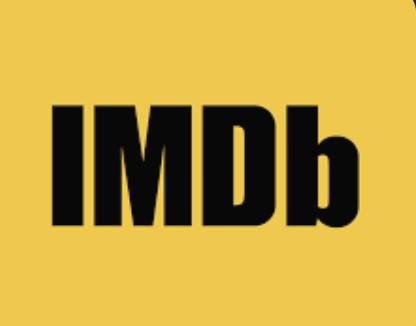



# **Abstracto:**
Pretendemos analizar las preferencias del publico en cuanto a la produccion cinematografica, esto resulta particularmente complicado en un mundo donde esta industria evoluciona constantemente. Vamos a analizar un amplio conjunto de datos con el objetivo de identificar patrones y tendencias lo mas precisas que podamos, tendencias relacionadas con la motivaciones detras de la creacion de peliculas y su audiencia objetivo.

# **Motivación:**
Bajo el complejo contexto donde la produccion cinematrografica es una empresa muy costosa y con muchos riesgos donde hay que tener muchos conocimientos del mercado y la audiencia el analisis es indispensable para la diferencia entre el exito o el fracaso de la industria. Nuestra motivación radica en analizar la información proporcionada por el conjunto de datos para identificar las principales razones que impulsan la creación de películas.
¿Qué géneros evolucionaron a travez del tiempo? ¿Cuál es la relación entre la calificación promedio y la cantidad de votos? ¿Cómo ha evolucionado la duración de las películas a lo largo del tiempo? Estas son algunas de las preguntas que nos proponemos responder.

# **Audiencia:**
Este trabajo está dirigido a investigadores, productores de cine y profesionales de la industria del cine interesados en comprender mejor la dinámica de la producción cinematográfica y las preferencias del público. Los resultados de este estudio pueden servir como guía para la toma de decisiones en la producción de películas y la identificación de oportunidades de mercado.

En resumen, este trabajo utiliza un conjunto de datos detallado de películas para arrojar luz sobre la motivación detrás de la creación de películas y su audiencia objetivo, con el objetivo de proporcionar información valiosa para la industria cinematográfica en constante cambio.




# **Objetivo:**
Analizar la progresión a lo largo del tiempo de las películas en los géneros de "Drama" y "Acción" con el propósito de identificar posibles disparidades significativas en la evolución de ambas categorías.
Para ello trabajaremos dos Hipotesis, una Nula y otra Alternativa.

# Hipótesis Nula (H0):
No existe una diferencia significativa en la evolución de las películas de género "Drama" en comparación con las películas de género "Acción". En otras palabras, la evolución promedio de las películas de ambos géneros es igual.


# Hipótesis Alternativa (H1):
Existe una diferencia significativa en la evolución de las películas de género "Drama" en comparación con las películas de género "Acción". Esto implica que la evolución promedio de las películas de un género es mayor o menor que la del otro género.




# ***# Analisis Exploratorio de Datos***

Una hipotesis presentada fue "Las películas de género "Acción" tienen una evolucion significativamente mayor que las películas de género "Drama".

Llegamos a la siguiente conclusion:
Nuestro análisis de la industria cinematográfica a lo largo de décadas revela una tendencia interesante en la evolución de los géneros de películas. En particular, hemos observado que las películas de drama han experimentado un cambio significativo a través de los años, mucho más pronunciado en comparación con las películas de acción.

A lo largo de las décadas, las películas de drama han demostrado una notable versatilidad y adaptación a las cambiantes preferencias y sensibilidades de la audiencia. Esto se refleja en la creación de historias con una variedad de temas y enfoques narrativos, que van desde el clásico drama romántico hasta el drama histórico, social o psicológico. Este enfoque diversificado ha permitido que el género del drama siga siendo relevante y atractivo para una audiencia amplia y en constante cambio.

En contraste, las películas de acción, aunque consistentemente populares, muestran una evolución menos marcada. A pesar de seguir siendo una elección predominante para los amantes de la emoción y la adrenalina, el género de acción ha mantenido un enfoque más constante en las secuencias de acción espectaculares y los héroes de acción carismáticos a lo largo de los años.

Si bien ambas categorías cinematográficas tienen su propio atractivo y han contribuido significativamente a la industria del cine, el género del drama ha demostrado ser particularmente adaptable y capaz de mantener su relevancia en una audiencia que busca una variedad de experiencias cinematográficas. Este análisis subraya la capacidad del drama para evolucionar y reinventarse a lo largo del tiempo, reflejando las cambiantes dinámicas culturales y sociales que influyen en la narración cinematográfica.



# Ahora realizamos un Analisis Exploratorio de Datos paso a paso:

# Paso 1: Carga y Exploración del Conjunto de Datos
Cargamos el conjunto de datos a analizar y verificamos las columnas necesarias para nuestro analisis. "startYear" y "genres".


# Paso 2: Filtrado de Datos
Creo dos subconjuntos de datos separados: uno para las películas de acción y otro para las películas de drama. Filtro las filas en función del género.

# Paso 3: Agregación de Datos
Agrupo las películas por año y cuento cuántas películas de acción y cuántas de drama se lanzaron cada año. Esto da una idea de cómo ha evolucionado la cantidad de películas en cada género a lo largo del tiempo.

# Paso 4: Visualización de Datos
Para visualizar mis hallazgos, creo gráficos y comparo para una forma facil de ver los datos.

# Paso 5: Análisis de Resultados
Observo la tendencia a lo largo del tiempo. ¿Qué género ha sido más popular en cada año? ¿Se ha mantenido constante la preferencia por las películas de acción o ha habido cambios significativos a lo largo de las décadas?




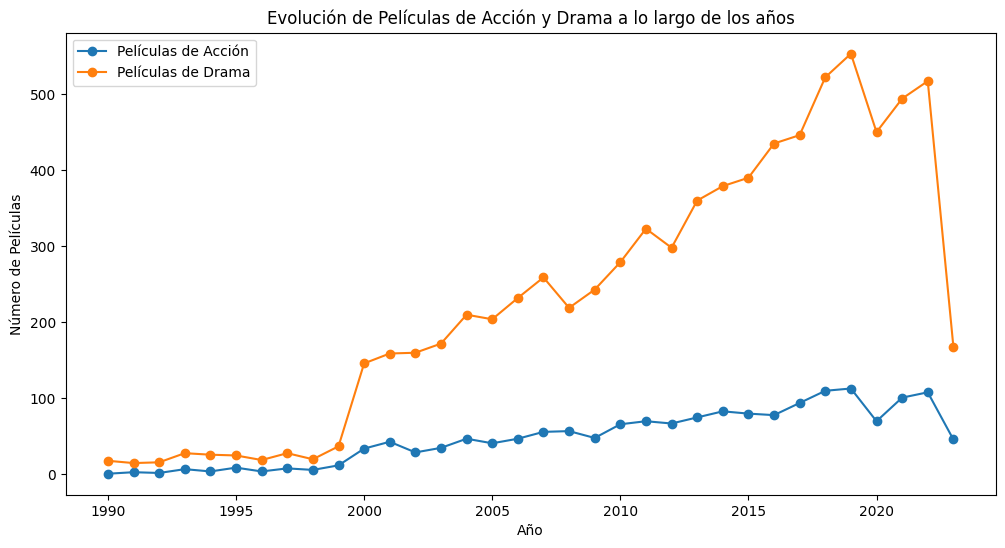

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

peliculas_de_accion = DF_IMDB[DF_IMDB['genres'].str.contains('Action', case=False, na=False)]
df_accion = peliculas_de_accion.copy()

peliculas_de_drama = DF_IMDB[DF_IMDB['genres'].str.contains('Drama', case=False, na=False)]
df_drama = peliculas_de_drama.copy()

# Agrupo y cuento la cantidad de películas de acción por año
accion_counts = df_accion.groupby('startYear').size()

# Agrupo y cuento la cantidad de películas de drama por año
drama_counts = DF_IMDB.groupby('startYear').size()

# Creo un gráfico de líneas para visualizar la evolución
plt.figure(figsize=(12, 6))
plt.plot(accion_counts.index, accion_counts.values, label='Películas de Acción', marker='o')
plt.plot(drama_counts.index, drama_counts.values, label='Películas de Drama', marker='o')

plt.title('Evolución de Películas de Acción y Drama a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.legend()

plt.show()


# Continuamos con el analisis para nuestra conclusion:

Mediante este gráfico, buscamos analizar la evolución de los géneros de películas a lo largo de un período de años y determinar si existe evidencia que respalde la hipótesis nula de que no hay una diferencia significativa entre el género 'Drama' y 'Acción'. La visualización nos brinda una perspectiva de cómo han variado estos géneros a lo largo del tiempo.

Nuestro objetivo es evaluar si, a pesar de las fluctuaciones observadas en la producción de películas de varios géneros, no se puede demostrar una diferencia estadísticamente relevante entre 'Drama' y 'Acción'. A través de un análisis exhaustivo, esperamos llegar a una conclusión sólida que respalde la premisa de que estos dos géneros no muestran una divergencia significativa en términos de cantidad de películas producidas en el período analizado."

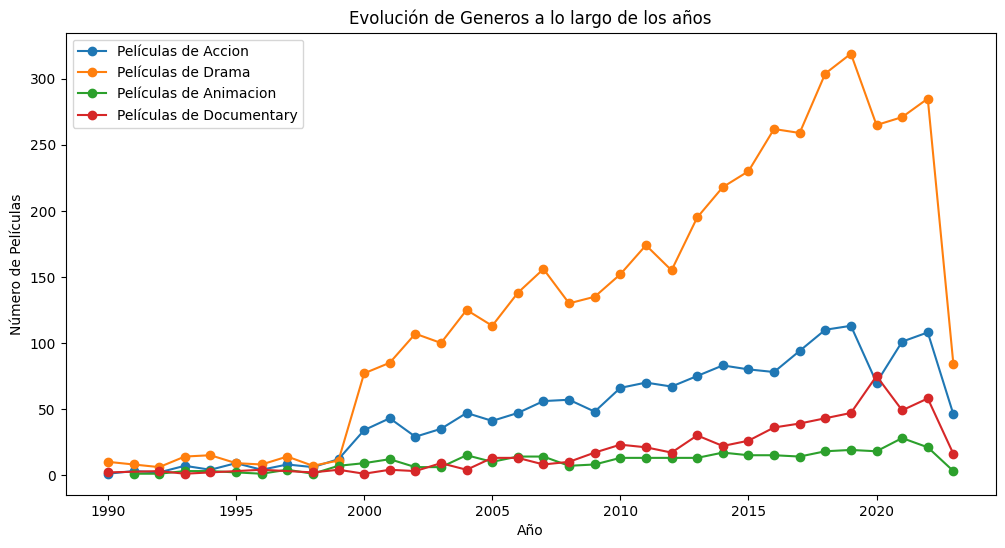

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

peliculas_de_accion = DF_IMDB[DF_IMDB['genres'].str.contains('Action', case=False, na=False)]
df_accion = peliculas_de_accion.copy()

peliculas_de_drama = DF_IMDB[DF_IMDB['genres'].str.contains('Drama', case=False, na=False)]
df_drama = peliculas_de_drama.copy()

peliculas_de_animation = DF_IMDB[DF_IMDB['genres'].str.contains('Animation', case=False, na=False)]
df_animation = peliculas_de_animation.copy()

peliculas_de_documentary = DF_IMDB[DF_IMDB['genres'].str.contains('Documentary', case=False, na=False)]
df_documentary = peliculas_de_documentary.copy()


# Agrupo y cuento la cantidad de películas de acción por año
accion_counts = df_accion.groupby('startYear').size()

# Agrupo y cuento la cantidad de películas de drama por año
drama_counts = df_drama.groupby('startYear').size()

# Agrupo y cuento la cantidad de películas de animation por año
animation_counts = df_animation.groupby('startYear').size()

# Agrupo y cuento la cantidad de películas de animation por año
documentary_counts = df_documentary.groupby('startYear').size()


# Creo un gráfico de líneas para visualizar la evolución
plt.figure(figsize=(12, 6))
plt.plot(accion_counts.index, accion_counts.values, label='Películas de Accion', marker='o')
plt.plot(drama_counts.index, drama_counts.values, label='Películas de Drama', marker='o')
plt.plot(animation_counts.index, animation_counts.values, label='Películas de Animacion', marker='o')
plt.plot(documentary_counts.index, documentary_counts.values, label='Películas de Documentary', marker='o')

plt.title('Evolución de Generos a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.legend()

plt.show()




¿La calificación promedio de las películas en el conjunto de datos es superior a 6?



Tras analizar la distribución de las calificaciones promedio de las películas en nuestro conjunto de datos, hemos encontrado que la mayoría de las películas tienen calificaciones superiores a 6. Con esto aparentemente se podría responder afirmativamente a la pregunta que nos planteamos en este apartado. La evidencia del gráfico sugiere que las películas en general tienden a recibir calificaciones favorables por parte de los usuarios o críticos, lo que indica un nivel de satisfacción por encima de la media.


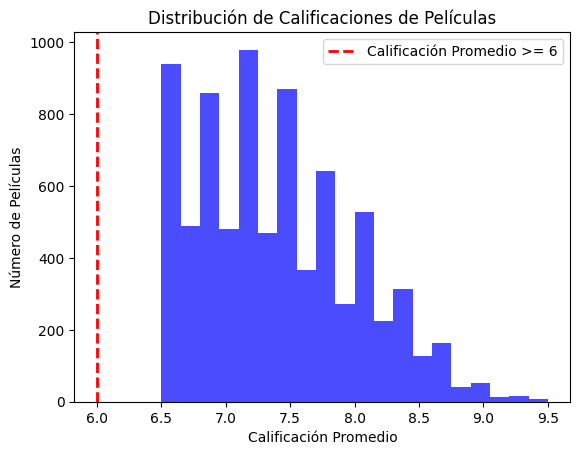

In [ ]:

import matplotlib.pyplot as plt


calificaciones_peliculas = DF_IMDB['averageRating']

# Creo un histograma
plt.hist(calificaciones_peliculas, bins=20, color='blue', alpha=0.7)
plt.axvline(x=6, color='red', linestyle='dashed', linewidth=2, label='Calificación Promedio >= 6')

# Etiquetas y título
plt.xlabel('Calificación Promedio')
plt.ylabel('Número de Películas')
plt.title('Distribución de Calificaciones de Películas')
plt.legend()

# Muestrohiijajaj el gráfico
plt.show()


¿La distribución de géneros cinematográficos ha evolucionado a lo largo de los años? ¿Es posible que ciertos géneros sean más comunes en ciertas décadas?

Analizando la evolución de los géneros cinematográficos a lo largo de las décadas, se puede examinar que la distribución de géneros se ha mantenido relativamente constante en el tiempo. Si bien ha habido fluctuaciones y cambios menores en la popularidad de géneros específicos en diferentes décadas, en general, no hemos observado una tendencia clara hacia la dominación de un género particular en una década en particular.

Nuestros gráficos y datos revelan que la producción cinematográfica ha experimentado un crecimiento significativo a lo largo de las décadas, abarcando una amplia variedad de géneros. Esto sugiere que la industria cinematográfica ha sido diversa y ha crecido significativamente a lo largo del tiempo.

En resumen, la evolución de los géneros ha ido en crecimiento constante y parejo a lo largo de las decadas.



<Figure size 2000x800 with 0 Axes>

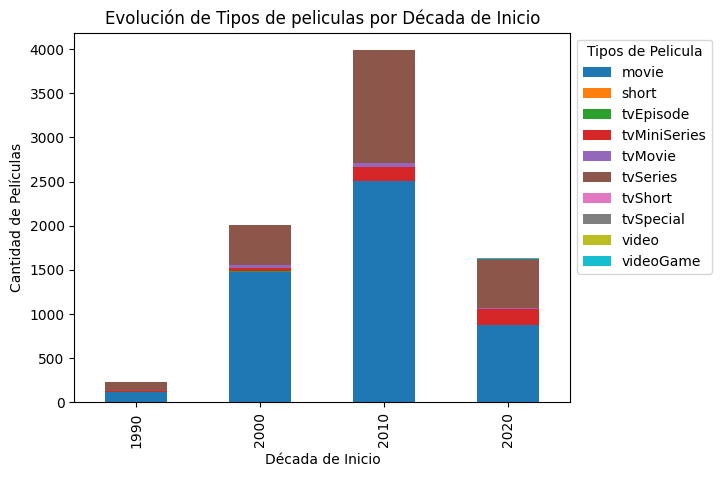

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Agrupo el conjunto de datos por década y tipos y cuento la cantidad de películas en cada grupo.
DF_IMDB['decade'] = (DF_IMDB['startYear'] // 10) * 10  # Agrupo por décadas
genre_decade_counts = DF_IMDB.groupby(['decade', 'titleType']).size().unstack(fill_value=0)

# Gráfico de barras apiladas para la evolución de tipos de pelis a lo largo de las décadas.
plt.figure(figsize=(20, 8))
genre_decade_counts.plot(kind='bar', stacked=True)
plt.xlabel('Década de Inicio')
plt.ylabel('Cantidad de Películas')
plt.title('Evolución de Tipos de peliculas por Década de Inicio')
plt.legend(title='Tipos de Pelicula', bbox_to_anchor=(1, 1))

# Muestro el gráfico
plt.show()


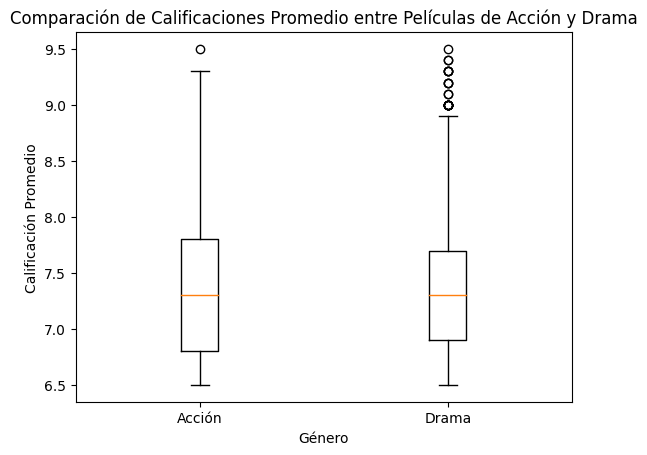

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Filtro las películas de género "Acción" y "Drama"
accion_movies = DF_IMDB[DF_IMDB['genres'].str.contains('Action')]
drama_movies = DF_IMDB[DF_IMDB['genres'].str.contains('Drama')]

# Creo un gráfico de cajas comparando las calificaciones promedio de ambos grupos
plt.boxplot([accion_movies['averageRating'], drama_movies['averageRating']], labels=['Acción', 'Drama'])

# Etiquetas y título
plt.xlabel('Género')
plt.ylabel('Calificación Promedio')
plt.title('Comparación de Calificaciones Promedio entre Películas de Acción y Drama')

# Muestro el gráfico
plt.show()


## Problema Analítico:

El problema analítico relacionado con el análisis evolutivo de géneros en la industria cinematográfica a lo largo de los años implica cómo utilizar datos históricos de películas para tomar decisiones informadas sobre la producción y promoción de géneros específicos. Esto requiere el análisis y la visualización de datos para identificar patrones de cambio en la popularidad de los géneros a lo largo del tiempo.

Un enfoque específico para el problema analítico podría ser la realización de un análisis de tendencias a largo plazo de los géneros cinematográficos, utilizando datos históricos de películas. Esto podría incluir la creación de gráficos que muestren la evolución de géneros a lo largo de décadas, la identificación de géneros en ascenso o declive, y la determinación de si ciertos géneros experimentan ciclos de popularidad.

El objetivo del análisis va a ser para nosotros proporcionar información valiosa para que las empresas cinematográficas tomen decisiones estratégicas sobre la producción y promoción de películas en función de las tendencias históricas y las preferencias cambiantes del público.

Este enfoque analítico puede ayudar a las empresas cinematográficas a optimizar sus inversiones y a alinear su cartera de películas con las oportunidades comerciales en la industria.

## Contexto Comercial en la Industria Cinematográfica:

Diversidad de Géneros: En el mundo del cine, se producen una amplia variedad de géneros que van desde el drama y la comedia hasta la acción, ciencia ficción, y géneros más especializados como el cine de terror o el documental. ¿Cómo pueden las empresas cinematográficas determinar qué géneros son más atractivos para el público en un momento dado?

Ciclos de Popularidad: ¿Existen ciclos de popularidad en la industria cinematográfica donde ciertos géneros experimentan picos de interés en diferentes períodos? Si es así, ¿cómo pueden las empresas aprovechar estos ciclos para maximizar sus ganancias?

Cambios en las Preferencias del Público: Las preferencias del público evolucionan con el tiempo debido a cambios culturales, sociales y tecnológicos. ¿Cómo pueden las empresas cinematográficas anticipar y adaptarse a estas cambiantes preferencias del público?

Inversiones en Marketing y Producción: La producción y promoción de películas son costosas, y las empresas necesitan asegurarse de que sus inversiones sean rentables. ¿Cómo pueden evaluar de manera efectiva la relación entre el presupuesto de una película y su rendimiento en taquilla, teniendo en cuenta el género?

Competencia Feroz: La competencia en la industria cinematográfica es intensa, con múltiples estudios y empresas compitiendo por la atención de las audiencias. ¿Cómo pueden las empresas mantenerse competitivas y destacar en un mercado saturado de películas?

Impacto de las Plataformas de Streaming: La proliferación de plataformas de streaming ha cambiado la forma en que las películas se distribuyen y consumen. ¿Cómo pueden las empresas tradicionales de cine competir y colaborar con estos nuevos actores en el mercado?


## Problema Comercial y Analítico:

El problema comercial se centra en la necesidad de tomar decisiones estratégicas en la selección de géneros cinematográficos para maximizar los ingresos y la inversión en un mercado altamente competitivo. El problema analítico implica cómo utilizar datos históricos para tomar decisiones informadas sobre la producción y promoción de géneros específicos. Algunas preguntas clave que se derivan de este contexto son:

¿Cómo identificar tendencias en la popularidad de los géneros cinematográficos a lo largo del tiempo?

¿Cuáles son los géneros que han demostrado un rendimiento sólido en términos de taquilla a lo largo de los años?

¿Existen diferencias significativas en la evolución de géneros específicos, como 'Drama' y 'Acción', que justifiquen decisiones estratégicas?

¿Cómo pueden las empresas utilizar el análisis de datos para predecir las preferencias futuras del público y adaptar sus estrategias comerciales en consecuencia?

¿Cuáles son las mejores prácticas en la toma de decisiones estratégicas basadas en análisis de datos en la industria cinematográfica?











---



# *Feature Selection*

Para validar nuestra hipótesis de que el género "Drama" ha evolucionado de manera más significativa que el género "Acción" a lo largo del tiempo en la industria cinematográfica, es esencial que nos centremos en las características que son relevantes para esta comparación. En este caso, las características pertinentes son los géneros cinematográficos a lo largo de los años.
Dado que mi objetivo es comparar la evolución de dos géneros específicos, el "Drama" y la "Acción," no es necesario realizar una selección de características en el sentido tradicional. En lugar de eso, debo asegurarte de que tu conjunto de datos esté correctamente estructurado para permitir esta comparación. Esto implica organizar mis datos de manera que pueda analizar directamente la evolución de la cantidad de películas de "Drama" y "Acción" a lo largo del tiempo.
Para esto debo:
* Preparar los Datos: Asegurarme que mi conjunto de datos contenga las columnas "Año" y "Género" y que estén formateadas de manera adecuada.
* Análisis Descriptivo: Con un análisis descriptivo que muestre cómo ha evolucionado la cantidad de películas de "Drama" y "Acción" a lo largo de los años.
* Pruebas Estadísticas: Necesito hacer pruebas estadísticas adecuadas para determinar si hay una diferencia significativa en la evolución de estos dos géneros. Voy a considerar pruebas de hipótesis, para comparar las tendencias a lo largo del tiempo.

Como estoy trabajando con una característica (genero) no seria necesario realizar una seleccion de características tradicional en este contexto pero voy a considerar una aproximación que implique la selección de características más relevantes para la comparación entre los géneros "Drama" y "Acción"
* Codificación de Variables Categóricas: Como mis datos están en formato categórico, "Drama" y "Acción", primero voy a codificar estas categorías en valores numéricos. Usando la codificación one-hot (binaria) para representar cada género como una variable binaria (1 para "Drama" y 0 para "Acción”.
* Selección de Características: Después de la codificación,  aplico técnicas de selección de características. Para mi caso, considero el uso de técnicas como la Prueba F (ANOVA) o el Chi-cuadrado para evaluar la importancia de cada género (característica) en relación con la variable objetivo (evolución a lo largo del tiempo).
* Establecimiento de un Umbral: Defino un umbral para seleccionar las características más relevantes. Utilizo estadísticas de prueba o puntuaciones de importancia para establecer este umbral.
* Análisis Comparativo: Una vez que reduje mis características a las más relevantes, realizo un análisis comparativo entre los géneros "Drama" y "Acción" en función de la evolución a lo largo del tiempo.

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Supongamos que tienes un DataFrame llamado 'df' con las columnas 'Año' y 'Género'

# Convierte la columna 'Año' a valores numéricos, si es posible
DF_IMDB['startYear'] = pd.to_numeric(DF_IMDB['startYear'], errors='coerce')

# Filtra las filas donde 'Año' no sea un valor numérico
DF_IMDB = DF_IMDB.dropna(subset=['startYear'])

# Codifica las variables categóricas (Género) como variables binarias (One-Hot Encoding)
df_encoded = pd.get_dummies(DF_IMDB, columns=['genres'], drop_first=False)  # drop_first=False para mantener todas las categorías

# Separa los datos en características (géneros) y variable objetivo (Año)
X = df_encoded.drop(columns=['startYear'])  # Excluimos la columna de 'Año'
y = df_encoded['startYear']

# Aplica SelectKBest con Chi-cuadrado para selección de características
selector = SelectKBest(score_func=chi2, k='all')  # 'all' para mantener todas las características
X_new = selector.fit_transform(X, y)

# Obtiene las puntuaciones de importancia de las características
scores = selector.scores_

# Crea un DataFrame con los nombres de las características y sus puntuaciones
feature_scores = pd.DataFrame({'Feature': X.columns, 'Chi-Squared Score': scores})
print(feature_scores)




ValueError: ignored

In [ ]:
print(DF_IMDB['startYear'].unique())

[1991 1994 1997 2005 2000 2001 1998 2002 2004 2009 2003 2007 2006 2017
 2014 2008 2013 2016 2012 2019 2022 2020 2021 2023 2010 2011 2018 2015
 1990 1992 1993 1995 1996 1999]




---



# *Vamos a intentar predecir la cantidad de peliculas de Drama que seran lanzadas en el proximo anio, para lo que usaremos un modelo de regresion*


* 		Preparación de datos:
    * Tengo un conjunto de datos históricos que incluye la cantidad de películas lanzadas en cada año. Esto podría incluir géneros, presupuesto, directores, actores, etc.
* 		Ingeniería de características:
    * Puedo crear características adicionales a partir de los datos existentes, como la tendencia histórica en el número de películas lanzadas o características relacionadas con los géneros de las películas.
* 		División de datos:
    * Divido mis datos en un conjunto de entrenamiento y un conjunto de prueba. Dado que estoy interesada en predecir el próximo año, puedo utilizar los datos históricos hasta un cierto año como conjunto de entrenamiento y los datos del año siguiente como conjunto de prueba.
* 		Selección de modelo de regresión:
    * Elijo el modelo de regresión temporal.
* 		Entrenamiento del modelo:
    * Entreno el modelo utilizando los datos de entrenamiento y las características seleccionadas.
* 		Predicción del próximo año:
    * Utilizo el modelo entrenado para hacer predicciones sobre la cantidad de películas que se lanzarán en el próximo año. Me aseguro de que las características de entrada para la predicción estén disponibles para ese año.
* 		Evaluación del modelo:
    * Evaluo el rendimiento del modelo utilizando métricas de regresión, como el error cuadrático medio (MSE) o el coeficiente de determinación (R^2), en los datos de prueba.
* 		Ajuste del modelo:
    * Si es necesario, ajusto el modelo y las características para mejorar la precisión de las predicciones.
* 		Predicción futura:
    * Una vez que tengo un modelo entrenado y evaluado, puedo usarlo para realizar predicciones de la cantidad de películas para años futuros.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

# Filtra las películas de género "Drama"
drama_movies = DF_IMDB[DF_IMDB['genres'] == 'Drama']

# Agrupa las películas por año y cuenta la cantidad de películas lanzadas en cada año
yearly_drama_counts = drama_movies.groupby('startYear').size().reset_index(name='Movie_Count')

# Establece el año para el cual deseas hacer la predicción (por ejemplo, el próximo año)
next_year = datetime.now().year + 1

# Prepara los datos de entrenamiento y prueba
X = yearly_drama_counts[['startYear']]
y = yearly_drama_counts['Movie_Count']

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo de regresión
model = LinearRegression()

# Crea un pipeline que incluye la transformación y el modelo
regression_pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])

# Ajusta el modelo a los datos de entrenamiento
regression_pipeline.fit(X_train, y_train)

# Realiza la predicción para el próximo año
next_year_prediction = regression_pipeline.predict([[next_year]])


print(f'Predicción para el próximo año ({next_year}): {int(next_year_prediction[0])} películas de género "Drama"')



Predicción para el próximo año (2024): 36 películas de género "Drama"


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
